In [81]:
import itertools
from collections import Counter
from parse import load_dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import folium as f

In [8]:
dataframes=load_dataframes()
n=100

In [3]:
# 폰트, 그래프 색상 설정
font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
if any(["notosanscjk" in font.lower() for font in font_list]):
  plt.rcParams["font.family"] = "Noto Sans CJK JP"
  # plt.rcParams["font.family"] = "AppleGothic" # 제 작업환경이 맥인 관계로 이부분 주석하고 윗부분 주석해제 하시면 됩니다.
else:
  if not any(["malgun" in font.lower() for font in font_list]):
    raise Exception(
        "Font missing, please install Noto Sans CJK or Malgun Gothic. If you're using ubuntu, try `sudo apt install fonts-noto-cjk`"
    )

  plt.rcParams["font.family"] = "Malgun Gothic"

sns.set_palette(sns.color_palette("Spectral"))
plt.rc("xtick", labelsize=6)

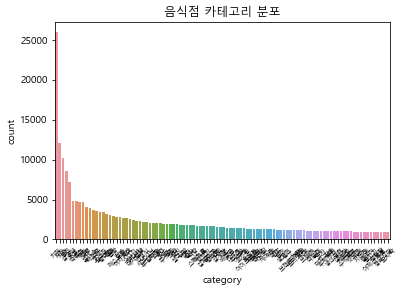

In [9]:
"""
Tutorial: 전체 음식점의 상위 `n`개 카테고리 분포를 그래프로 나타냅니다.
"""

stores = dataframes["stores"]

# 모든 카테고리를 1차원 리스트에 저장합니다
categories = stores.category.apply(lambda c: c.split("|"))
categories = itertools.chain.from_iterable(categories)

# 카테고리가 없는 경우 / 상위 카테고리를 추출합니다
categories = filter(lambda c: c != "", categories)
categories_count = Counter(list(categories))
best_categories = categories_count.most_common(n=n)
df = pd.DataFrame(best_categories, columns=["category", "count"]).sort_values(
    by=["count"], ascending=False
)

# 그래프로 나타냅니다
chart = sns.barplot(x="category", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("음식점 카테고리 분포")
plt.show()

      score  index
1     29337      1
2      8065      2
3      3371      3
4      1693      4
5       950      5
6       586      6
7       398      7
8       262      8
9       195      9
10      144     10
11      106     11
12      102     12
13       73     13
14       60     14
15       40     15
17       37     17
16       37     16
18       28     18
20       24     20
19       24     19
23       16     23
21       16     21
22       15     22
24       14     24
27       11     27
26       10     26
25       10     25
29        8     29
30        6     30
35        5     35
37        5     37
34        4     34
33        4     33
32        4     32
49        4     49
44        4     44
40        3     40
31        3     31
36        3     36
55        3     55
39        2     39
48        2     48
53        1     53
64        1     64
61        1     61
28        1     28
65        1     65
59        1     59
58        1     58
42        1     42
51        1     51
41        1 

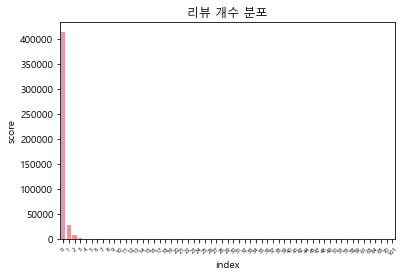

In [99]:
"""
Req. 1-3-1 전체 음식점의 리뷰 개수 분포를 그래프로 나타냅니다. 
"""
# 왼쪽 id, 오른쪽 store 기준으로 공통 된 것 merge
stores_reviews = pd.merge(
    dataframes["stores"], dataframes["reviews"], left_on="id", right_on="store", how="outer"
)
# 리뷰가 0인 가게
zero=stores_reviews['score'].isna().sum()
# # 가게 id, 가게 이름으로 그룹화
scores_group = stores_reviews.groupby(["store", "store_name"])
scores_group=scores_group.count()["score"].value_counts()

df = pd.DataFrame(scores_group)
df['index']=df.index
df.loc[0]=[zero,0]
print(df)
# df.set_index("index",inplace=True)
# df.set_index("sc",inplace=True)
# 그래프로 나타냅니다
chart = sns.barplot(x="index", y="score", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("리뷰 개수 분포")
plt.show()

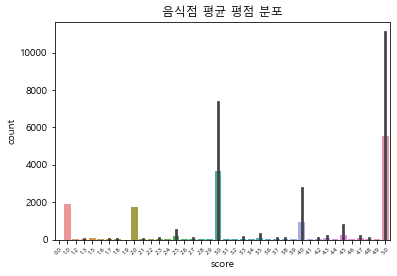

In [106]:
"""
Req. 1-3-2 각 음식점의 평균 평점을 그래프로 나타냅니다.
"""
# 왼쪽 id, 오른쪽 store 기준으로 공통 된 것 merge
stores_reviews = pd.merge(
    dataframes["stores"], dataframes["reviews"], left_on="id", right_on="store", how="outer"
)

# # 가게 id, 가게 이름으로 그룹화
scores_group = stores_reviews.groupby(["store", "store_name"])
scores_group=scores_group.mean()["score"].value_counts()

df = pd.DataFrame(scores_group)
df['index']=df.index

df=(df.round(1))
df.columns = ['count', 'score']
# 그래프로 나타냅니다
chart = sns.barplot(x="score", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("음식점 평균 평점 분포")
plt.show()